### EDA on Iris dataset

#### Import Libraries

In [ ]:
import pandas as pd ## pandas for manipulation
import numpy as numpy ##  num
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Load the  Iris dataset 
df=sns.load_dataset('iris')

In [ ]:
## display first 05 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
## get data types, column names 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe() ## get the summary statistic (mean,min,max, std etc)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
## Check null values and their sum
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
### Check duplicated rows
df.duplicated().sum()

1

In [8]:
## Drop duplicated values
df.drop_duplicates(inplace=True)

### Univariate Analysis

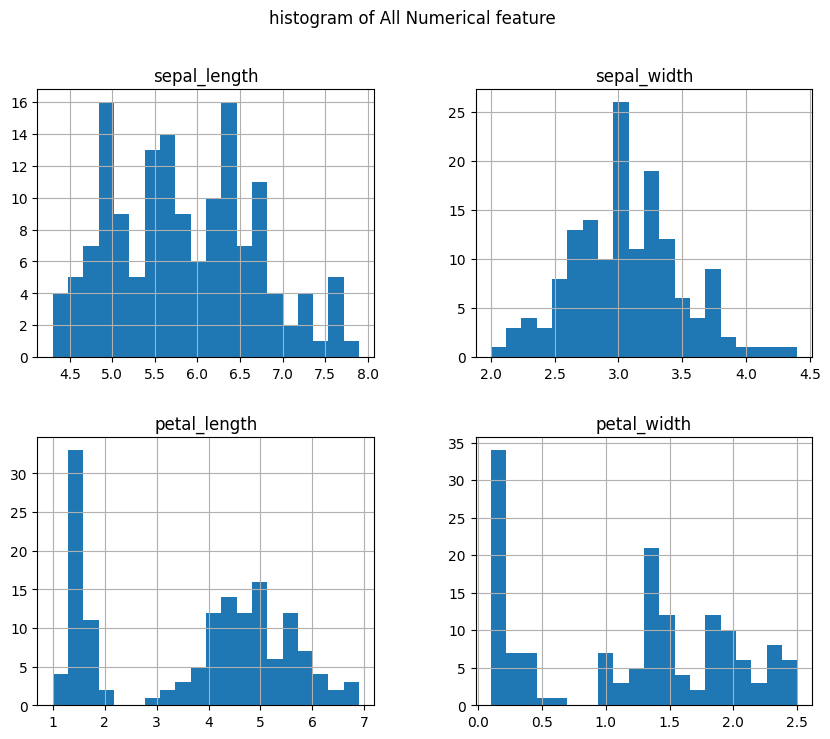

In [10]:
df.hist(figsize=(10,8), bins=20)
plt.suptitle("histogram of All Numerical feature")
plt.show()

### Outliers

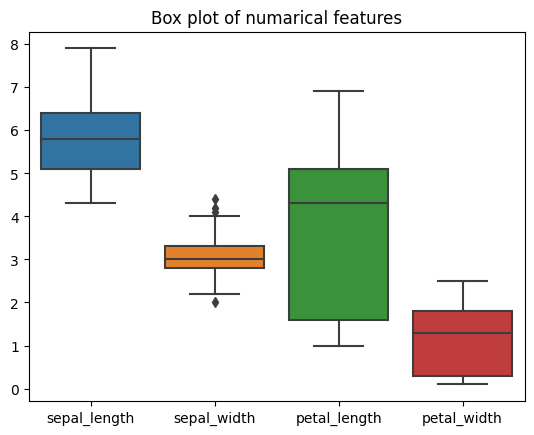

In [11]:
plt.Figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title('Box plot of numarical features')
plt.show()

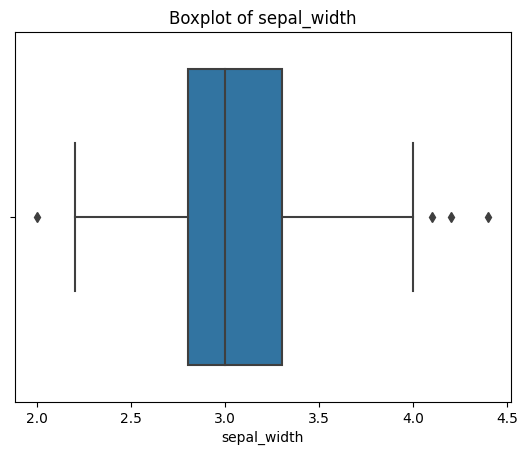

In [12]:
## Check outliers in sepal_width by using boxplot
sns.boxplot(x=df['sepal_width'])
plt.title('Boxplot of sepal_width')
plt.show()

In [14]:
## Check numbers of outliers in sepal_width
Q1=df['sepal_width'].quantile(0.25)
Q3=df['sepal_width'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=df[(df['sepal_width']< lower_bound)| (df['sepal_width']>upper_bound)]
print(' number of outliers in sepal width',len(outliers))

 number of outliers in sepal width 4


In [ ]:
## remove outliers from sepal_width
df=df[(df['sepal_width']>=lower_bound)& (df['sepal_width']<=upper_bound)]

In [16]:
len(df)

145

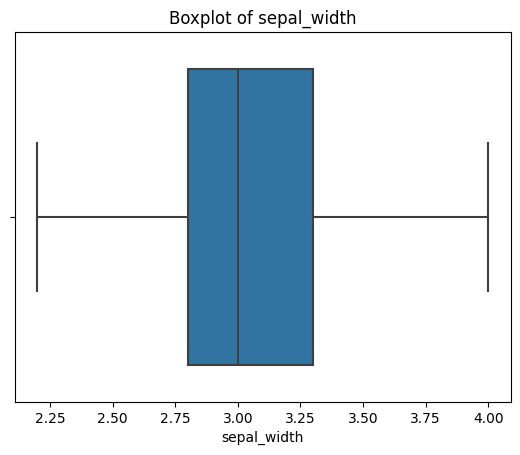

In [17]:
sns.boxplot(x=df['sepal_width'])
plt.title('Boxplot of sepal_width')
plt.show()

In [42]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### KDE plot

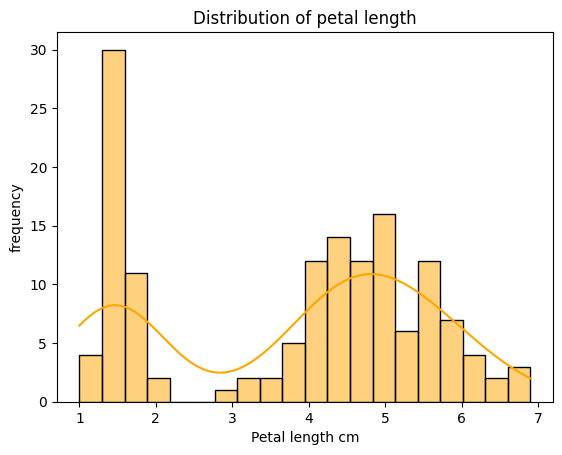

In [19]:
sns.histplot(df['petal_length'],
             kde=True, bins=20, color='orange')
plt.title('Distribution of petal length')
plt.xlabel('Petal length cm')
plt.ylabel("frequency")
plt.show()

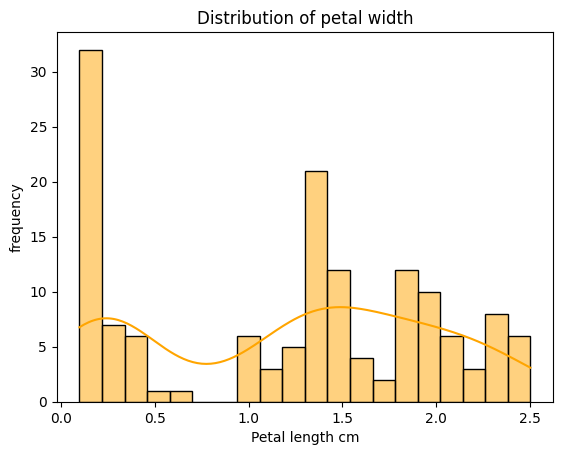

In [20]:
sns.histplot(df['petal_width'],
             kde=True, bins=20, color='orange')
plt.title('Distribution of petal width')
plt.xlabel('Petal width cm')
plt.ylabel("frequency")
plt.show()

In [22]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [23]:
# List of numeric columns
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Loop through each column and calculate stats
for col in numeric_cols:
    print(f"\n Stats for {col}:")
    print(f"Mean:   {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Mode:   {df[col].mode()[0]:.2f}")
    print(f"Std:    {df[col].std():.2f}")


 Stats for sepal_length:
Mean:   5.86
Median: 5.80
Mode:   5.00
Std:    0.84

 Stats for sepal_width:
Mean:   3.04
Median: 3.00
Mode:   3.00
Std:    0.40

 Stats for petal_length:
Mean:   3.80
Median: 4.40
Mode:   1.40
Std:    1.76

 Stats for petal_width:
Mean:   1.22
Median: 1.30
Mode:   0.20
Std:    0.76


### Multivariate analysis

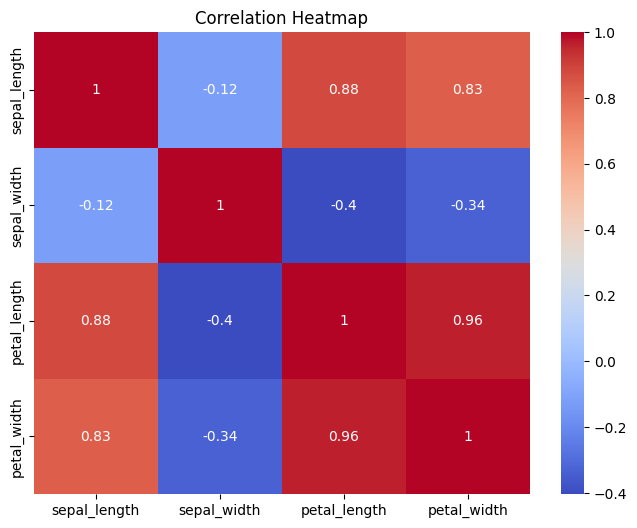

In [24]:
## Correation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

c:\Users\KASHIF\miniconda3\envs\pandas_env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


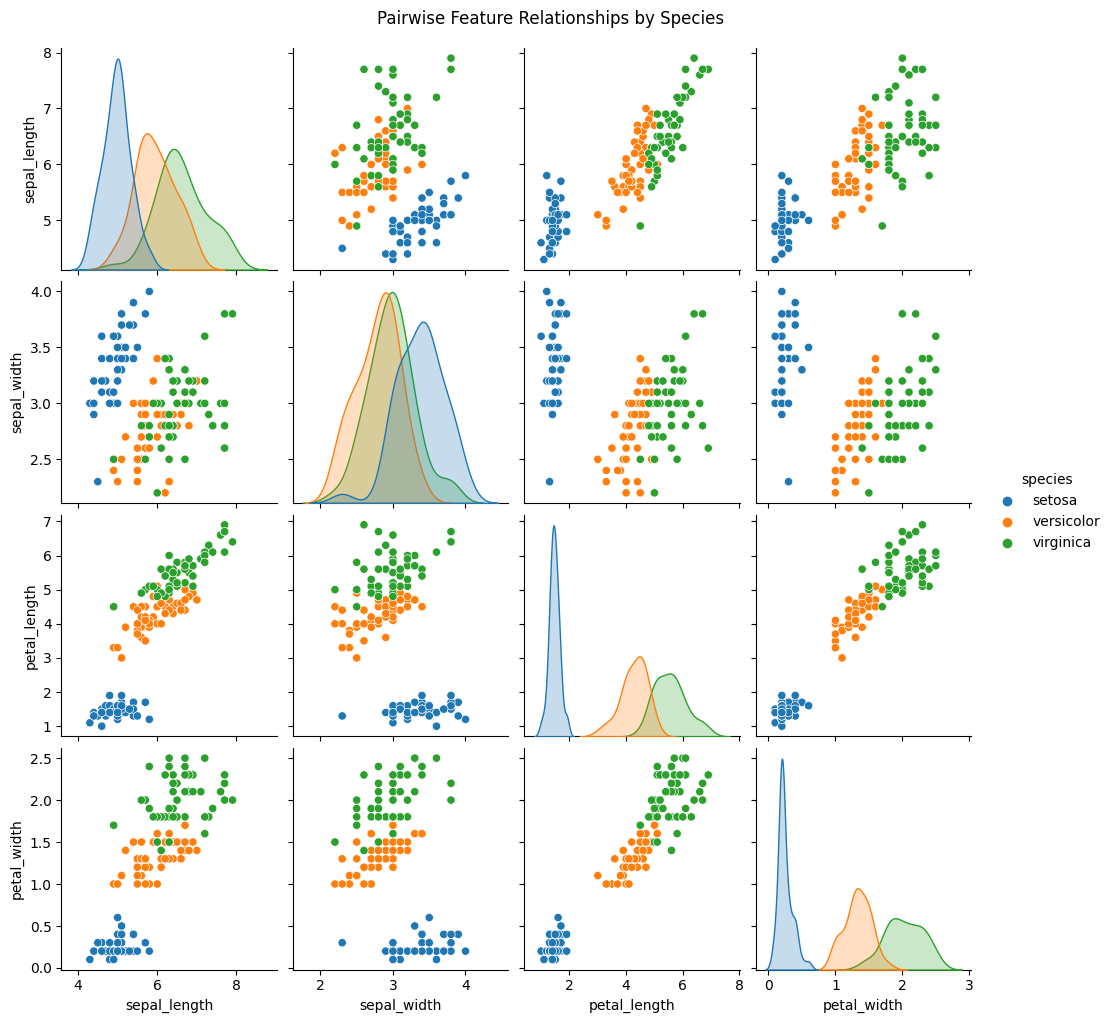

In [26]:
## Pair plot
sns.pairplot(df, hue='species')
plt.suptitle("Pairwise Feature Relationships by Species", y=1.02)
plt.show()

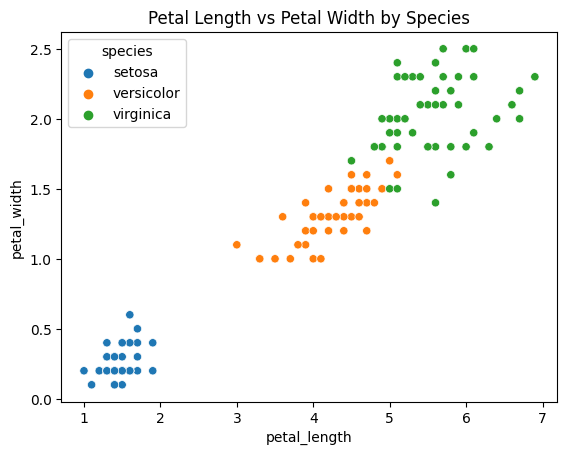

In [28]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.title("Petal Length vs Petal Width by Species")
plt.show()

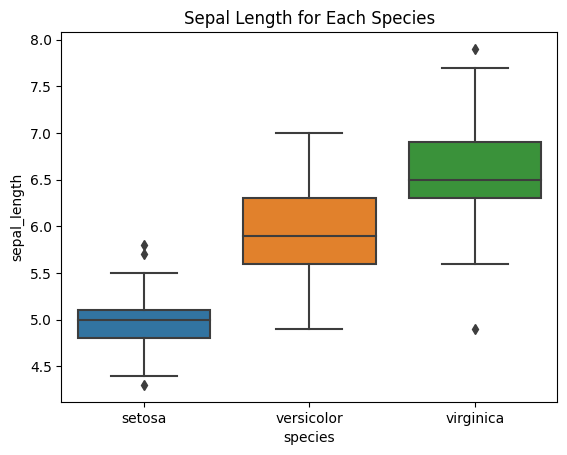

In [30]:
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title("Sepal Length for Each Species")
plt.show()

### data visuilization

#### Bar plot 

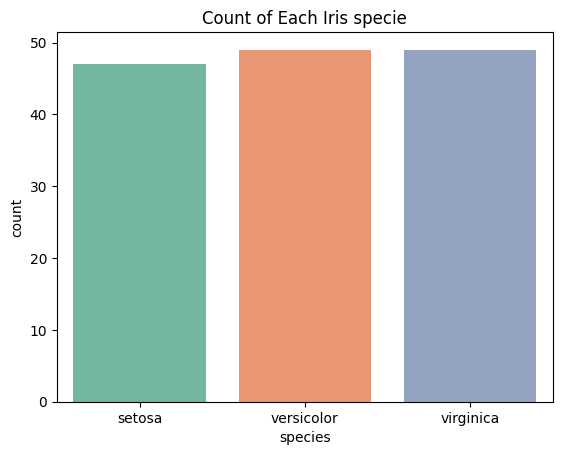

In [32]:
## Count of eaxh species
sns.countplot(data=df, x='species', palette='Set2')
plt.title('Count of Each Iris specie')
plt.show()

#### Box plot

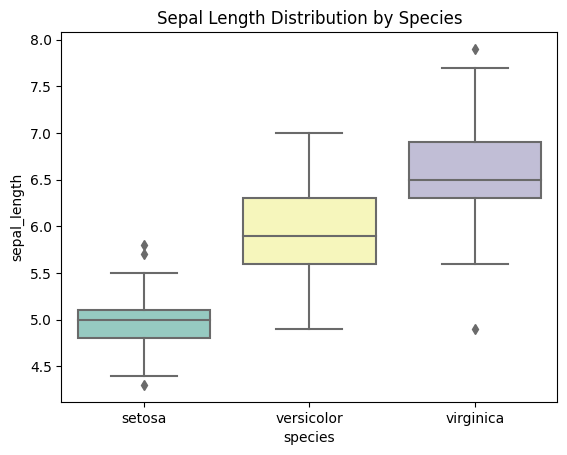

In [34]:
## box plot sepal lenth by specie
sns.boxplot(data=df, x='species', y='sepal_length', palette='Set3')
plt.title("Sepal Length Distribution by Species")
plt.show()

#### Voilin plot 

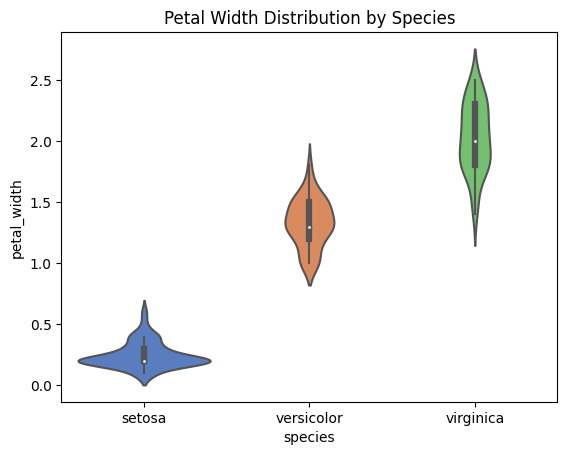

In [37]:
## petal width by specie
sns.violinplot(data=df, x='species', y='petal_width', palette='muted')
plt.title("Petal Width Distribution by Species")
plt.show()

#### Join plot

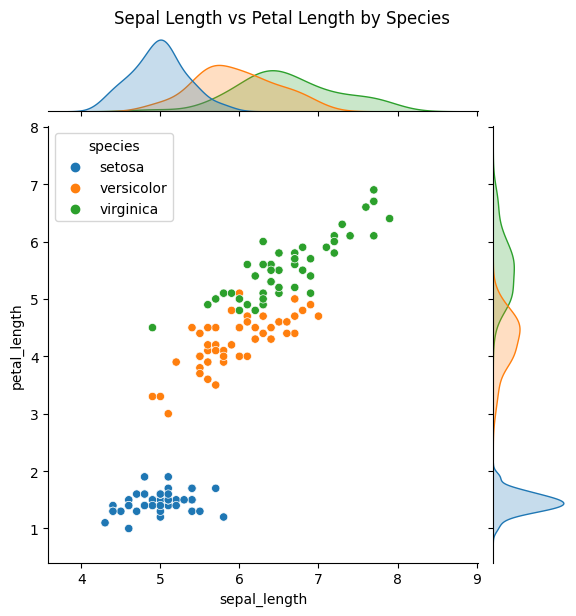

In [40]:
## sepal vs petal length
sns.jointplot(data=df, x='sepal_length', y='petal_length', kind='scatter', hue='species')
plt.suptitle("Sepal Length vs Petal Length by Species", y=1.02)
plt.show()

## EDA Summary Report

### 1. Dataset Overview
- *Dataset*: Iris Flower Dataset  
- *Total Records*: 150  
- *Columns*: 5  
  - 4 numerical features: sepal_length, sepal_width, petal_length, petal_width  
  - 1 categorical feature: species  
- *Target Classes*: Setosa, Versicolor, Virginica  
- The dataset is balanced with 50 samples per species.

---

### 2. Data Cleaning
- No missing values were found.
- No duplicate rows detected.
- All feature types are consistent:
  - Numeric features are of float type.
  - Target feature species is categorical.

---

### 3. Univariate Analysis
- Histograms showed approximate normal distribution for most features.
- Boxplots revealed mild outliers in sepal_width, which were removed using the IQR method.
- Descriptive statistics (mean, median, standard deviation) were calculated for all features.
- petal_length and petal_width showed the highest variation among species.

---

### 4. Bivariate and Multivariate Analysis
- Pairplots revealed that:
  - petal_length and petal_width provide strong class separation.
  - Setosa is easily separable from other species.
- A correlation heatmap showed:
  - Strong positive correlation between petal_length and petal_width.
  - Moderate positive correlation between sepal_length and petal_length.
- Jointplots showed distinct clustering based on petal and sepal features.

---

### 5. Visual Insights
- Class distribution bar plot confirmed that the dataset is balanced.
- Boxplots showed variation in sepal_length and petal_length across species.
- Violin plots helped visualize the distribution of petal width per species.
- Joint plots highlighted the relationship and clustering between sepal width and petal width.

---

### 6. Key Insights
- Setosa has the smallest petal features and is easily distinguishable.
- Virginica has the largest petal dimensions.
- petal_length and petal_width are the most significant features for species classification.
- The dataset is clean, well-structured, and suitable for classification problems.

---

### 7. Conclusion
This EDA helped identify patterns, clean the data, and extract valuable insights from the Iris dataset. It confirms that the dataset is ideal for training and evaluating classification models, especially in beginner-level machine learning tasks.